### Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
# Load the final dataset
df = pd.read_csv("Final_Filtered_Dataset.csv")

### Exploratory Data Analysis

Missing Values:
 Province                               0
YEAR                                   0
QUARTER                                0
Quarterly Avg Temp (°C)                0
Quarterly Sum Precip (mm)              0
CPI Average                            0
CPI value Cumulative                   0
CPI Compounded                         0
Excellent_Very_Good                    0
Good                                   0
Fair_Poor                              0
Debt_to_Asset_Ratio                    0
Mortgage_Debt_to_Real_Estate_Ratio     0
Depression                             0
Anxiety                                0
Mental Health Help                    62
Therapy                                0
Stress                                 0
Unemplyment Rate                       0
dtype: int64

Summary Statistics:
               YEAR     QUARTER  Quarterly Avg Temp (°C)  \
count   100.000000  100.000000               100.000000   
mean   2022.000000    2.500000                 8.40

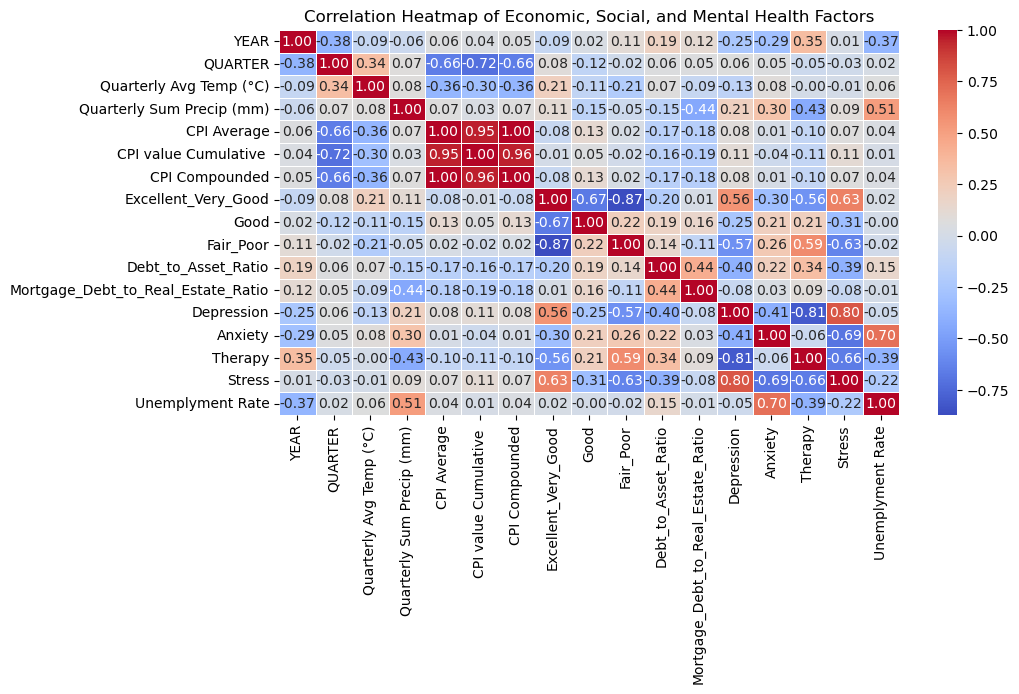

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Display summary statistics
print("\nSummary Statistics:\n", df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Economic, Social, and Mental Health Factors")
plt.show()

### Modelling

Results for Fair_Poor with Random Forest:
MSE: 1.8646, RMSE: 1.3655, R²: 0.8574
Results for Fair_Poor with XGBoost:
MSE: 1.6763, RMSE: 1.2947, R²: 0.8718


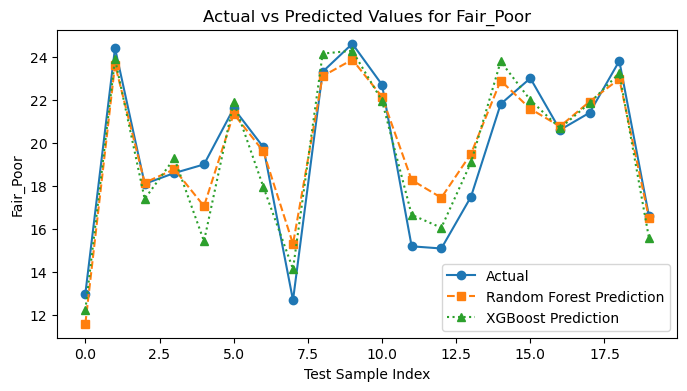

Results for Excellent_Very_Good with Random Forest:
MSE: 1.0255, RMSE: 1.0127, R²: 0.9462
Results for Excellent_Very_Good with XGBoost:
MSE: 1.5036, RMSE: 1.2262, R²: 0.9211


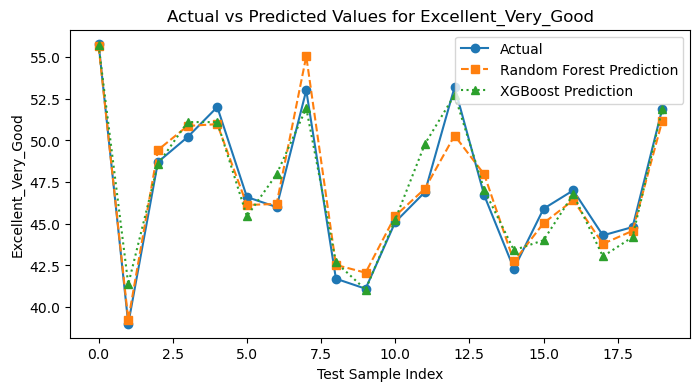

Results for Good with Random Forest:
MSE: 2.1617, RMSE: 1.4703, R²: 0.5551
Results for Good with XGBoost:
MSE: 2.0804, RMSE: 1.4424, R²: 0.5718


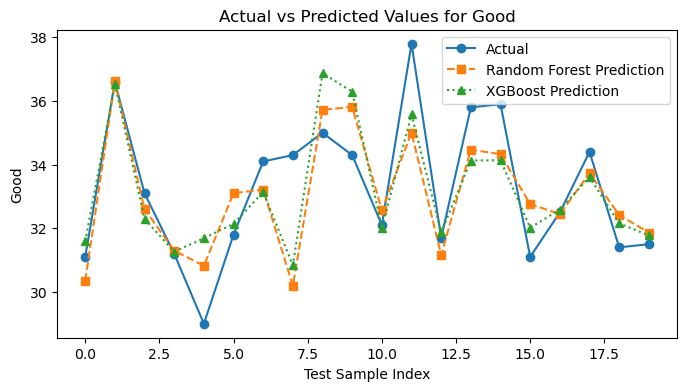

In [4]:

# Load the dataset
file_path = 'Final_Filtered_Dataset.csv'  
df = pd.read_csv(file_path)

# Remove the 'CPI Value Cumulative' and 'CPI Compounded' columns
df = df.drop(columns=['CPI Value Cumulative', 'CPI Compounded', 'Mental Health Help'], errors='ignore')

# Drop non-numeric and target variables for features
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical columns
target_variables = ['Fair_Poor', 'Excellent_Very_Good', 'Good']

# Function to evaluate and plot the models
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, target_name):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MSE, RMSE, R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print(f"Results for {target_name} with {model_name}:")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    
    return y_test, y_pred

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred_rf, y_pred_xgb, target_name):
    plt.figure(figsize=(8, 4))
    
    # Plot Actual vs Predicted for Random Forest and XGBoost
    plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', linestyle='solid')
    plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Random Forest Prediction", linestyle='dashed', marker='s')
    plt.plot(range(len(y_pred_xgb)), y_pred_xgb, label="XGBoost Prediction", linestyle='dotted', marker='^')
    
    # Add labels and title
    plt.xlabel("Test Sample Index")
    plt.ylabel(target_name)
    plt.title(f"Actual vs Predicted Values for {target_name}")
    plt.legend()
    plt.show()

# Train and evaluate models for each target variable
for target in target_variables:
    y = df_encoded[target]  
    
    # Define feature set (exclude the target variable and other non-relevant columns)
    X = df_encoded.drop(columns=target)  # Use all features except the target
    
    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Train XGBoost Model
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Evaluate models and get predictions for plotting
    y_test_rf, y_pred_rf = evaluate_model(rf_model, "Random Forest", X_train, X_test, y_train, y_test, target)
    y_test_xgb, y_pred_xgb = evaluate_model(xgb_model, "XGBoost", X_train, X_test, y_train, y_test, target)
    
    # Plot Actual vs Predicted for each target
    plot_actual_vs_predicted(y_test_rf, y_pred_rf, y_pred_xgb, target)


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load the dataset
file_path = 'Final_Filtered_Dataset.csv'  
df = pd.read_csv(file_path)

# Remove the 'CPI Value Cumulative' and 'CPI Compounded' columns
df = df.drop(columns=['CPI Value Cumulative', 'CPI Compounded'], errors='ignore')

# Drop non-numeric and target variables for features
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical columns
target_variables = ['Fair_Poor', 'Excellent_Very_Good', 'Good']

# Initialize dictionaries to store actual and predicted values for both models
predictions_rf = {
    'Fair_Poor Actual': [],
    'Fair_Poor Random Forest Predicted': [],
    'Excellent_Very_Good Actual': [],
    'Excellent_Very_Good Random Forest Predicted': [],
    'Good Actual': [],
    'Good Random Forest Predicted': []
}

predictions_xgb = {
    'Fair_Poor Actual': [],
    'Fair_Poor XGBoost Predicted': [],
    'Excellent_Very_Good Actual': [],
    'Excellent_Very_Good XGBoost Predicted': [],
    'Good Actual': [],
    'Good XGBoost Predicted': []
}

# Train and evaluate models for each target variable
for target in target_variables:
    y = df_encoded[target]  # Set target variable
    
    # Define feature set (exclude the target variable and other non-relevant columns)
    X = df_encoded.drop(columns=target)  # Use all features except the target
    
    # Train Random Forest Model on the entire dataset
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    
    # Train XGBoost Model on the entire dataset
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X, y)
    
    # Generate predictions for the entire dataset
    y_pred_rf = rf_model.predict(X)
    y_pred_xgb = xgb_model.predict(X)
    
    # Append the actual and predicted values to the respective lists for Random Forest
    predictions_rf['Fair_Poor Actual'].extend(y if target == 'Fair_Poor' else [])
    predictions_rf['Fair_Poor Random Forest Predicted'].extend(y_pred_rf if target == 'Fair_Poor' else [])
    
    predictions_rf['Excellent_Very_Good Actual'].extend(y if target == 'Excellent_Very_Good' else [])
    predictions_rf['Excellent_Very_Good Random Forest Predicted'].extend(y_pred_rf if target == 'Excellent_Very_Good' else [])
    
    predictions_rf['Good Actual'].extend(y if target == 'Good' else [])
    predictions_rf['Good Random Forest Predicted'].extend(y_pred_rf if target == 'Good' else [])
    
    # Append the actual and predicted values to the respective lists for XGBoost
    predictions_xgb['Fair_Poor Actual'].extend(y if target == 'Fair_Poor' else [])
    predictions_xgb['Fair_Poor XGBoost Predicted'].extend(y_pred_xgb if target == 'Fair_Poor' else [])
    
    predictions_xgb['Excellent_Very_Good Actual'].extend(y if target == 'Excellent_Very_Good' else [])
    predictions_xgb['Excellent_Very_Good XGBoost Predicted'].extend(y_pred_xgb if target == 'Excellent_Very_Good' else [])
    
    predictions_xgb['Good Actual'].extend(y if target == 'Good' else [])
    predictions_xgb['Good XGBoost Predicted'].extend(y_pred_xgb if target == 'Good' else [])

# Convert the dictionaries to DataFrames
rf_results_df = pd.DataFrame(predictions_rf)
xgb_results_df = pd.DataFrame(predictions_xgb)

# Save the results to separate CSV files
rf_results_df.to_csv('random_forest_predictions.csv', index=False)
xgb_results_df.to_csv('xgboost_predictions.csv', index=False)

print("Random Forest predictions saved to: random_forest_predictions.csv")
print("XGBoost predictions saved to: xgboost_predictions.csv")


Random Forest predictions saved to: random_forest_predictions.csv
XGBoost predictions saved to: xgboost_predictions.csv


In [6]:
import pandas as pd

# Load the dataset
file_path = 'Final_Filtered_Dataset.csv' 
df = pd.read_csv(file_path)

# Load the predictions for Random Forest and XGBoost
rf_predictions_path = 'random_forest_predictions.csv'
#xgb_predictions_path = 'xgboost_predictions.csv'

# Load the predictions CSV files
rf_results_df = pd.read_csv(rf_predictions_path)
#xgb_results_df = pd.read_csv(xgb_predictions_path)

# Merge the dataset with the Random Forest predictions (drop target actuals to avoid duplicates)
df_combined_rf = pd.concat([df, rf_results_df.drop(columns=['Fair_Poor Actual', 'Excellent_Very_Good Actual', 'Good Actual'])], axis=1)

# Merge the dataset with the XGBoost predictions 
#df_combined = pd.concat([df_combined_rf, xgb_results_df.drop(columns=['Fair_Poor Actual', 'Excellent_Very_Good Actual', 'Good Actual'])], axis=1)

# Save the combined dataset to a new CSV file
combined_file_path = 'combined_predictions.csv'
df_combined_rf.to_csv(combined_file_path, index=False)

# Confirm file saving
f"Combined dataset saved to: {combined_file_path}"


'Combined dataset saved to: combined_predictions.csv'

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Final_Filtered_Dataset.csv'  
df = pd.read_csv(file_path)

# Drop the 'CPI Compounded' and 'CPI Value Cumulative' columns
df = df.drop(columns=['CPI Value Cumulative', 'CPI Compounded'], errors='ignore')

# Drop non-numeric and target variables for features
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical columns
target_variables = ['Fair_Poor', 'Excellent_Very_Good', 'Good']

# Store results for later display
results_rf = []
results_xgb = []

# Function to evaluate and return model metrics
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, target_name):
    y_pred = model.predict(X_test)
    
    # Calculate MSE, RMSE, R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Return the results
    return mse, rmse, r2

# Track overall metrics for Random Forest and XGBoost
total_mse_rf, total_rmse_rf, total_r2_rf = 0, 0, 0
total_mse_xgb, total_rmse_xgb, total_r2_xgb = 0, 0, 0

# Train and evaluate models for all target variables
for target in target_variables:
    y = df_encoded[target]  # Set target variable
    
    # Define feature set (exclude the target variable and other non-relevant columns)
    X = df_encoded.drop(columns=target)  # Use all features except the target
    
    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    mse_rf, rmse_rf, r2_rf = evaluate_model(rf_model, "Random Forest", X_train, X_test, y_train, y_test, target)
    
    # Train XGBoost Model
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)
    mse_xgb, rmse_xgb, r2_xgb = evaluate_model(xgb_model, "XGBoost", X_train, X_test, y_train, y_test, target)
    
    # Add to total metrics for each model
    total_mse_rf += mse_rf
    total_rmse_rf += rmse_rf
    total_r2_rf += r2_rf
    
    total_mse_xgb += mse_xgb
    total_rmse_xgb += rmse_xgb
    total_r2_xgb += r2_xgb

# Calculate average performance for each model
average_mse_rf = total_mse_rf / len(target_variables)
average_rmse_rf = total_rmse_rf / len(target_variables)
average_r2_rf = total_r2_rf / len(target_variables)

average_mse_xgb = total_mse_xgb / len(target_variables)
average_rmse_xgb = total_rmse_xgb / len(target_variables)
average_r2_xgb = total_r2_xgb / len(target_variables)

# Print the overall model performance
print("Overall Model Performance:")
print(f"Random Forest - MSE: {average_mse_rf:.4f}, RMSE: {average_rmse_rf:.4f}, R²: {average_r2_rf:.4f}")
print(f"XGBoost - MSE: {average_mse_xgb:.4f}, RMSE: {average_rmse_xgb:.4f}, R²: {average_r2_xgb:.4f}")


Overall Model Performance:
Random Forest - MSE: 1.6839, RMSE: 1.2828, R²: 0.7862
XGBoost - MSE: 1.7534, RMSE: 1.3211, R²: 0.7882


Overall Model Performance:
Random Forest - MSE: 7.8847, RMSE: 2.8080, R²: 0.1990
XGBoost - MSE: 11.8263, RMSE: 3.4389, R²: -0.0945



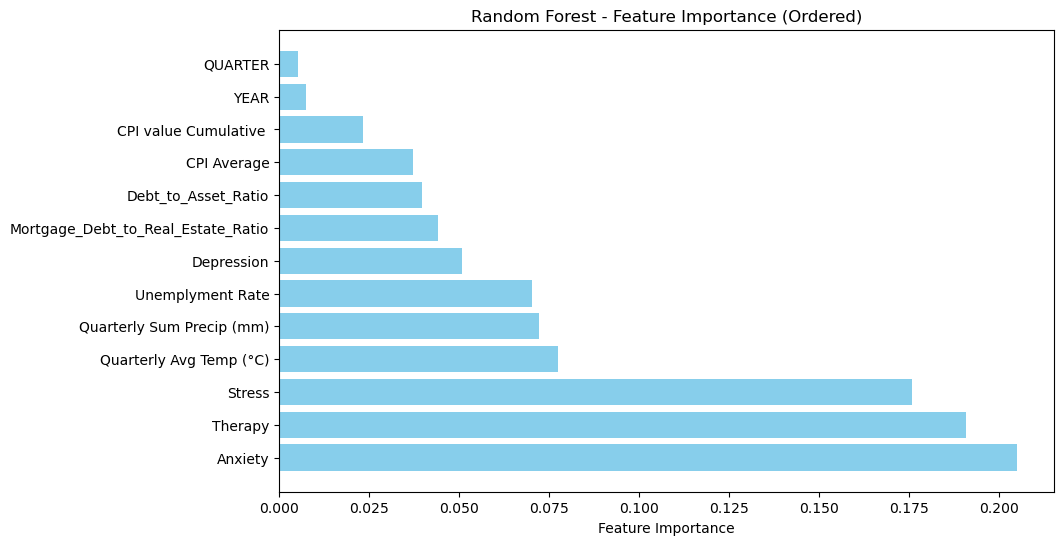

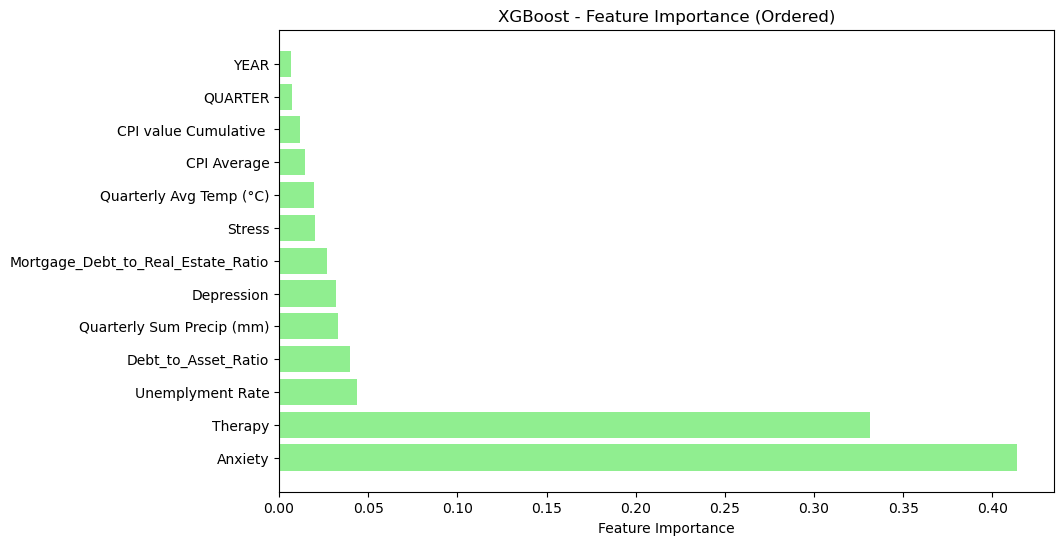

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Final_Filtered_Dataset.csv'  
df = pd.read_csv(file_path)

# Remove 'CPI Value Cumulative', 'CPI Compounded', and 'Province' columns
df = df.drop(columns=['CPI Value Cumulative', 'CPI Compounded', 'Province'], errors='ignore')

# Drop non-numeric and target variables for features
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical columns
target_variables = ['Fair_Poor', 'Excellent_Very_Good', 'Good']

# Define feature set and target variables
X = df_encoded.drop(columns=target_variables)  # Features excluding the target columns
y = df_encoded[target_variables]  # Targets: Fair_Poor, Excellent_Very_Good, Good

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest & XGBoost models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate overall model performance for all targets at once
def evaluate_overall(y_true, y_pred_rf, y_pred_xgb):
    print("Overall Model Performance:")
    
    # Calculate MSE, RMSE, R² for Random Forest
    mse_rf = mean_squared_error(y_true, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = r2_score(y_true, y_pred_rf)
    
    # Calculate MSE, RMSE, R² for XGBoost
    mse_xgb = mean_squared_error(y_true, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_true, y_pred_xgb)
    
    # Print the overall performance metrics
    print(f"Random Forest - MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
    print(f"XGBoost - MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}\n")

evaluate_overall(y_test, y_pred_rf, y_pred_xgb)

# Feature Importance for Random Forest
rf_importances = rf_model.feature_importances_
rf_features = X.columns

# Sort feature importance for Random Forest in descending order
sorted_rf_idx = np.argsort(rf_importances)[::-1]  # Sort indices in descending order
sorted_rf_importances = rf_importances[sorted_rf_idx]
sorted_rf_features = rf_features[sorted_rf_idx]

# Plotting feature importance for Random Forest (sorted)
plt.figure(figsize=(10, 6))
plt.barh(sorted_rf_features, sorted_rf_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance (Ordered)')
plt.show()

# Feature Importance for XGBoost
xgb_importances = xgb_model.feature_importances_

# Sort feature importance for XGBoost in descending order
sorted_xgb_idx = np.argsort(xgb_importances)[::-1]  # Sort indices in descending order
sorted_xgb_importances = xgb_importances[sorted_xgb_idx]
sorted_xgb_features = rf_features[sorted_xgb_idx]

# Plotting feature importance for XGBoost (sorted)
plt.figure(figsize=(10, 6))
plt.barh(sorted_xgb_features, sorted_xgb_importances, color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('XGBoost - Feature Importance (Ordered)')
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'Final_Filtered_Dataset.csv'  
df = pd.read_csv(file_path)

# Remove unnecessary columns like 'CPI Value Cumulative', 'CPI Compounded', 'Mental Health Help', 'Year', 'Quarter', 'Province'
df = df.drop(columns=['CPI Value Cumulative', 'CPI Compounded', 'Mental Health Help', 'Year', 'Quarter', 'Province'], errors='ignore')

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# List of target variables
target_variables = ['Fair_Poor', 'Excellent_Very_Good', 'Good']

# Initialize lists to store feature importance data for both models
rf_feature_importance_list = []
xgb_feature_importance_list = []

# Train and evaluate models for each target variable
for target in target_variables:
    y = df_encoded[target]  # Set target variable
    
    # Define feature set (exclude the target variable and other non-relevant columns)
    X = df_encoded.drop(columns=target_variables)  # Use all features except the target variables

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Feature importance extraction for Random Forest
    rf_importances = rf_model.feature_importances_
    sorted_rf_idx = np.argsort(rf_importances)[::-1]  # Sort indices in descending order
    sorted_rf_importances = rf_importances[sorted_rf_idx]
    sorted_rf_features = X.columns[sorted_rf_idx]
    
    # Store the results for Random Forest (Top 5 features only)
    rf_target_df = pd.DataFrame({
        'Target': [target] * 5,
        'Feature': sorted_rf_features[:5],
        'Importance Score': sorted_rf_importances[:5]
    })
    rf_feature_importance_list.append(rf_target_df)
    
    # Train XGBoost Model
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Feature importance extraction for XGBoost
    xgb_importances = xgb_model.feature_importances_
    sorted_xgb_idx = np.argsort(xgb_importances)[::-1]  # Sort indices in descending order
    sorted_xgb_importances = xgb_importances[sorted_xgb_idx]
    sorted_xgb_features = X.columns[sorted_xgb_idx]
    
    # Store the results for XGBoost (Top 5 features only)
    xgb_target_df = pd.DataFrame({
        'Target': [target] * 5,
        'Feature': sorted_xgb_features[:5],
        'Importance Score': sorted_xgb_importances[:5]
    })
    xgb_feature_importance_list.append(xgb_target_df)

# Combine all feature importance data for Random Forest and XGBoost
rf_feature_importance_df = pd.concat(rf_feature_importance_list)
xgb_feature_importance_df = pd.concat(xgb_feature_importance_list)

# Save the Random Forest feature importance to a CSV
rf_feature_importance_df.to_csv('random_forest_top5_feature_importance.csv', index=False)

# Save the XGBoost feature importance to a CSV
xgb_feature_importance_df.to_csv('xgboost_top5_feature_importance.csv', index=False)

print("Top 5 feature importance CSV files for Random Forest and XGBoost have been created.")


Top 5 feature importance CSV files for Random Forest and XGBoost have been created.


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Final_Filtered_Dataset.csv' 
df = pd.read_csv(file_path)

# Remove 'CPI Value Cumulative', 'CPI Compounded', and 'Province' columns
df = df.drop(columns=['CPI Value Cumulative', 'CPI Compounded', 'Province'], errors='ignore')

# Manually select top 10 features based on feature importance
selected_features = [
    'Anxiety', 
    'Therapy', 
    'Stress', 
    'Unemplyment Rate', 
    'Quarterly Avg Temp (°C)', 
    'Quarterly Sum Precip (mm)', 
    'Debt_to_Asset_Ratio', 
    'Mortgage_Debt_to_Real_Estate_Ratio', 
    'Depression', 
    'CPI Average'
]

# Define feature set and target variables using the selected features
X = df[selected_features]  # Select only the top important features
y = df[['Fair_Poor', 'Excellent_Very_Good', 'Good']]  # Targets: Fair_Poor, Excellent_Very_Good, Good

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest & XGBoost models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate overall model performance for all targets at once
def evaluate_overall(y_true, y_pred_rf, y_pred_xgb):
    print("Overall Model Performance:")
    
    # Calculate MSE, RMSE, R² for Random Forest
    mse_rf = mean_squared_error(y_true, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = r2_score(y_true, y_pred_rf)
    
    # Calculate MSE, RMSE, R² for XGBoost
    mse_xgb = mean_squared_error(y_true, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_true, y_pred_xgb)
    
    # Print the overall performance metrics
    print(f"Random Forest - MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
    print(f"XGBoost - MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}\n")

evaluate_overall(y_test, y_pred_rf, y_pred_xgb)


Overall Model Performance:
Random Forest - MSE: 7.4848, RMSE: 2.7358, R²: 0.2328
XGBoost - MSE: 10.6740, RMSE: 3.2671, R²: -0.0298



Results for Fair_Poor with Random Forest:
MSE: 5.3162, RMSE: 2.3057, R²: 0.5933
Results for Fair_Poor with XGBoost:
MSE: 8.8840, RMSE: 2.9806, R²: 0.3203


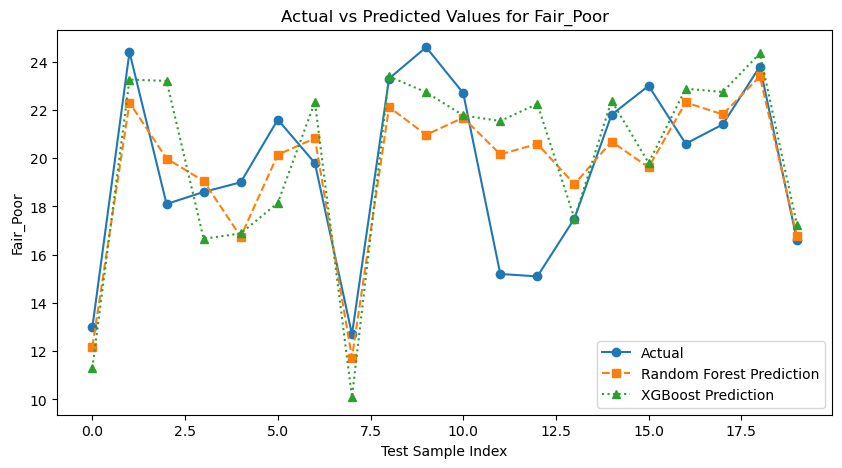

Results for Excellent_Very_Good with Random Forest:
MSE: 8.5339, RMSE: 2.9213, R²: 0.5520
Results for Excellent_Very_Good with XGBoost:
MSE: 15.5018, RMSE: 3.9372, R²: 0.1862


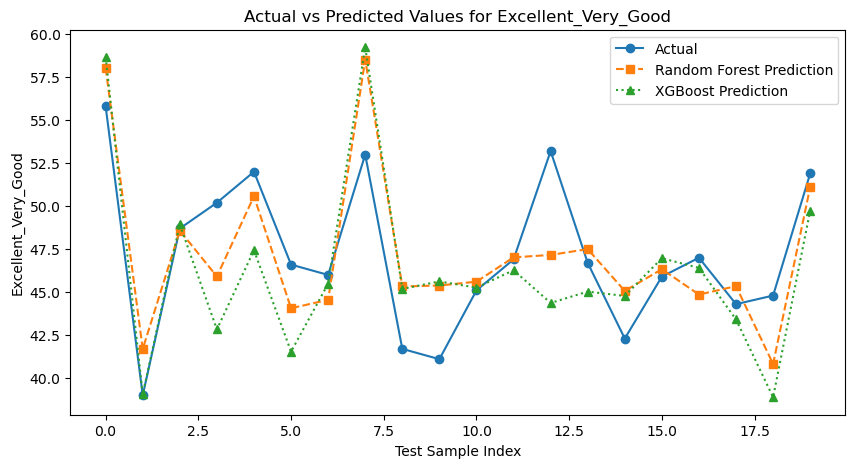

Results for Good with Random Forest:
MSE: 6.0413, RMSE: 2.4579, R²: -0.2435
Results for Good with XGBoost:
MSE: 8.1539, RMSE: 2.8555, R²: -0.6784


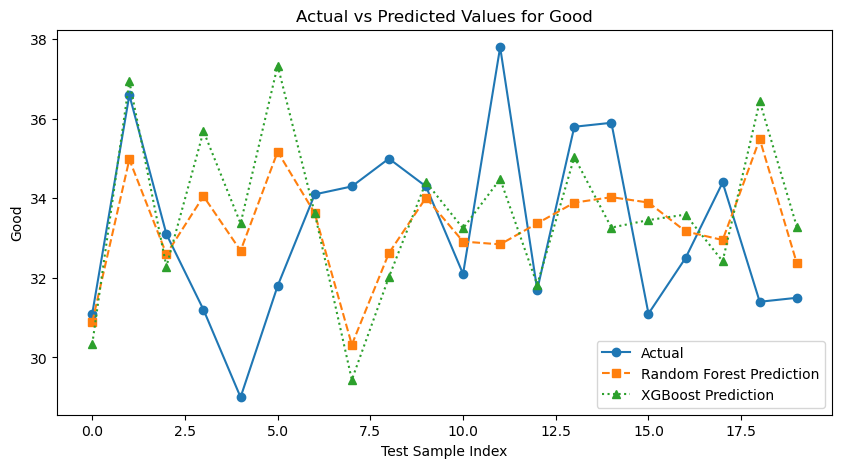

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Final_Filtered_Dataset.csv' 
df = pd.read_csv(file_path)

# Remove the 'CPI Value Cumulative' and 'CPI Compounded' columns
df = df.drop(columns=['CPI Value Cumulative', 'CPI Compounded'], errors='ignore')

# Manually select top 10 features based on feature importance
selected_features = [
    'Anxiety', 
    'Therapy', 
    'Stress', 
    'Unemplyment Rate', 
    'Quarterly Avg Temp (°C)', 
    'Quarterly Sum Precip (mm)', 
    'Debt_to_Asset_Ratio', 
    'Mortgage_Debt_to_Real_Estate_Ratio', 
    'Depression', 
    'CPI Average'
]

# Drop non-numeric and target variables for features
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical columns
target_variables = ['Fair_Poor', 'Excellent_Very_Good', 'Good']

# Define feature set using the top 10 selected features
X = df_encoded[selected_features]  # only the top 10 features
y = df_encoded[target_variables]  # Targets: Fair_Poor, Excellent_Very_Good, Good

# Function to evaluate and plot the models
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, target_name):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate MSE, RMSE, R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print(f"Results for {target_name} with {model_name}:")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    
    return y_test, y_pred

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred_rf, y_pred_xgb, target_name):
    plt.figure(figsize=(10, 5))
    
    # Plot Actual vs Predicted for Random Forest and XGBoost
    plt.plot(range(len(y_test)), y_test, label="Actual", marker='o', linestyle='solid')
    plt.plot(range(len(y_pred_rf)), y_pred_rf, label="Random Forest Prediction", linestyle='dashed', marker='s')
    plt.plot(range(len(y_pred_xgb)), y_pred_xgb, label="XGBoost Prediction", linestyle='dotted', marker='^')
    
    # Add labels and title
    plt.xlabel("Test Sample Index")
    plt.ylabel(target_name)
    plt.title(f"Actual vs Predicted Values for {target_name}")
    plt.legend()
    plt.show()

# Train and evaluate models for each target variable
for target in target_variables:
    y = df_encoded[target]  # Set target variable
    
    # Define feature set 
    X = df_encoded[selected_features]  # top 10 features only
    
    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Train XGBoost Model
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Evaluate models and get predictions for plotting
    y_test_rf, y_pred_rf = evaluate_model(rf_model, "Random Forest", X_train, X_test, y_train, y_test, target)
    y_test_xgb, y_pred_xgb = evaluate_model(xgb_model, "XGBoost", X_train, X_test, y_train, y_test, target)
    
    # Plot Actual vs Predicted for each target
    plot_actual_vs_predicted(y_test_rf, y_pred_rf, y_pred_xgb, target)
